<a href="https://colab.research.google.com/github/Rajyalaxmi29/pandas/blob/main/practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
data = {
    "Employee_ID": [101, 102, 103, 104, 105, 106, 107, 108],
    "Name": ["Asha", "Ravi", "Meena", "John", "Kiran", "Sita", "Arun", "Neha"],
    "Department": ["IT", "HR", "IT", "Finance", "HR", "IT", "Finance", "HR"],
    "Age": [25, 29, 35, 41, 28, np.nan, 38, 26],
    "Salary": [50000, 42000, 60000, 80000, 45000, 52000, np.nan, 48000],
    "Experience": [2, 4, 8, 15, 3, 5, 12, 2]
}

df = pd.DataFrame(data)
df

,Employee_ID,Name,Department,Age,Salary,Experience
0,101,Asha,IT,25.0,50000.0,2
1,102,Ravi,HR,29.0,42000.0,4
2,103,Meena,IT,35.0,60000.0,8
3,104,John,Finance,41.0,80000.0,15
4,105,Kiran,HR,28.0,45000.0,3
5,106,Sita,IT,NaN,52000.0,5
6,107,Arun,Finance,38.0,NaN,12
7,108,Neha,HR,26.0,48000.0,2


Q1️⃣ (Very Easy – Pandas Basics)

Display:

First 5 rows

Last 3 rows

Data types of all columns

👉 Interview angle: “How do you quickly understand a new dataset?”

In [42]:
df.head()
df.tail(3)
df.dtypes

,0
Employee_ID,int64
Name,object
Department,object
Age,float64
Salary,float64
Experience,int64


Q2️⃣ (Easy – Indexing & Selection)

Using .loc and .iloc:

Select only Name, Department, and Salary

Extract rows from index 2 to 5 using both .loc and .iloc

👉 Interview angle: Difference between label-based vs position-based indexing

In [43]:
df.iloc[:,[1,2,4]]
df.iloc[[2,3,4,5],:]

,Employee_ID,Name,Department,Age,Salary,Experience
2,103,Meena,IT,35.0,60000.0,8
3,104,John,Finance,41.0,80000.0,15
4,105,Kiran,HR,28.0,45000.0,3
5,106,Sita,IT,NaN,52000.0,5


Q3️⃣ (Easy–Medium – Boolean Filtering)

Filter employees:

From IT department

With Salary > 50,000

And Experience ≥ 3 years

👉 Use boolean operators (&, |), not and/or

👉 Interview angle: Why and/or does not work in Pandas

In [44]:
s=df[np.logical_and(df["Department"]=="IT",df['Salary']>50000,df['Experience']>=3)]
s

,Employee_ID,Name,Department,Age,Salary,Experience
2,103,Meena,IT,35.0,60000.0,8
5,106,Sita,IT,NaN,52000.0,5


Q4️⃣ (Medium – Missing Values Handling)

Identify columns with missing values

Fill:

Missing Age with mean Age

Missing Salary with median Salary

Verify no missing values remain

👉 Interview angle: Mean vs Median — when to use which?

In [45]:
mean=df['Age'].mean()
df['Age']=df['Age'].fillna(mean)
df
median=df['Salary'].median()
df['Salary']=df['Salary'].fillna(median)
df
df.notnull()

,Employee_ID,Name,Department,Age,Salary,Experience
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True


Q5️⃣ (Medium – NumPy + Pandas Logic)

Create a new column Salary_Level:

"Low" → Salary < 50,000

"Medium" → 50,000 ≤ Salary < 70,000

"High" → Salary ≥ 70,000

👉 Use NumPy np.where() or np.select()

👉 Interview angle: Vectorization vs loops

In [47]:
def r(d):
  if d["Salary"]<50000 :
    return "low"
  elif d["Salary"]>=50000 and d["Salary"]<=70000:
    return "medium"
  else:
    return "high"
df["salary_level"]=df.apply(r,axis=1)
df
#or
conditions = [
    df['Salary'] < 50000,
    (df['Salary'] >= 50000) & (df['Salary'] < 70000),
    df['Salary'] >= 70000
]

choices = ['Low', 'Medium', 'High']

df['Salary_Level'] = np.select(conditions, choices)
df




,Employee_ID,Name,Department,Age,Salary,Experience,salary_level
0,101,Asha,IT,25.000000,50000.0,2,medium
1,102,Ravi,HR,29.000000,42000.0,4,low
2,103,Meena,IT,35.000000,60000.0,8,medium
3,104,John,Finance,41.000000,80000.0,15,high
4,105,Kiran,HR,28.000000,45000.0,3,low
5,106,Sita,IT,31.714286,52000.0,5,medium
6,107,Arun,Finance,38.000000,50000.0,12,medium
7,108,Neha,HR,26.000000,48000.0,2,low


Q6️⃣ (Medium–Hard – Loops + Conditional Logic)

Without using Pandas built-in functions:

Use a for loop

Count how many employees fall into each Salary_Level

👉 Interview angle: When loops are acceptable vs when they’re not

In [51]:
df.groupby('salary_level').salary_level.count()
df.salary_level.value_counts()

,count
salary_level,
medium,4
low,3
high,1


Q7️⃣ (Hard – Logical Operations & Compound Conditions)

Create a DataFrame of “High-Risk Attrition Employees” where:

Age < 30 AND

Experience < 3 OR

Salary < department average salary

👉 Use:

Groupby

Boolean logic

NumPy logical operators

👉 Interview angle: Operator precedence & business logic translation

In [56]:
m=df.groupby("Department")["Salary"].transform("mean")

HighRisk=df[np.logical_or(np.logical_and(df["Age"]<30,df["Experience"]<3),
                                                     df['Salary']<m)]
HighRisk

,Employee_ID,Name,Department,Age,Salary,Experience,salary_level
0,101,Asha,IT,25.000000,50000.0,2,medium
1,102,Ravi,HR,29.000000,42000.0,4,low
5,106,Sita,IT,31.714286,52000.0,5,medium
6,107,Arun,Finance,38.000000,50000.0,12,medium
7,108,Neha,HR,26.000000,48000.0,2,low


Q8️⃣ (Hard – Axis, Apply, Custom Functions)

Create a function that:

Increases salary by 10% if Experience > 10

Increases salary by 5% if Experience is between 5 and 10

No change otherwise

Apply it correctly using:

axis=1

👉 Interview angle: Row-wise vs column-wise operations

In [57]:
def q(r):
  if r["Experience"]>10:
    return r["Salary"]*1.10
  else:
    return r["Salary"]*1.05
df["Salary"]=df.apply(q,axis=1)
df

,Employee_ID,Name,Department,Age,Salary,Experience,salary_level
0,101,Asha,IT,25.000000,52500.0,2,medium
1,102,Ravi,HR,29.000000,44100.0,4,low
2,103,Meena,IT,35.000000,63000.0,8,medium
3,104,John,Finance,41.000000,88000.0,15,high
4,105,Kiran,HR,28.000000,47250.0,3,low
5,106,Sita,IT,31.714286,54600.0,5,medium
6,107,Arun,Finance,38.000000,55000.0,12,medium
7,108,Neha,HR,26.000000,50400.0,2,low


Q9️⃣ (Hard – Data Visualization with Matplotlib)

Create 3 plots:

Bar plot – Average salary by department

Histogram – Salary distribution

Scatter plot – Experience vs Salary

👉 Label axes, add titles, and grid

👉 Interview angle: Choosing the right visualization

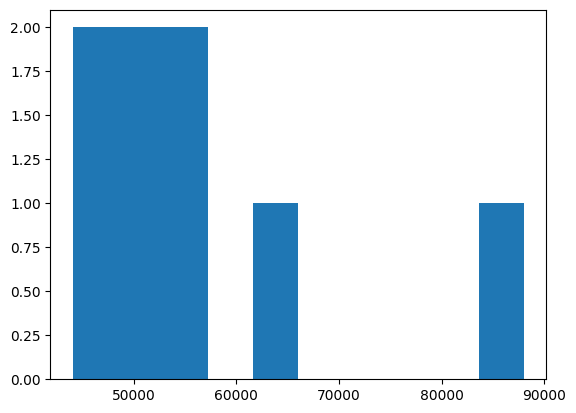

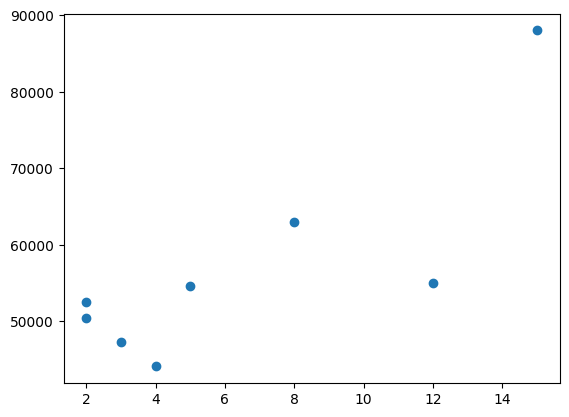

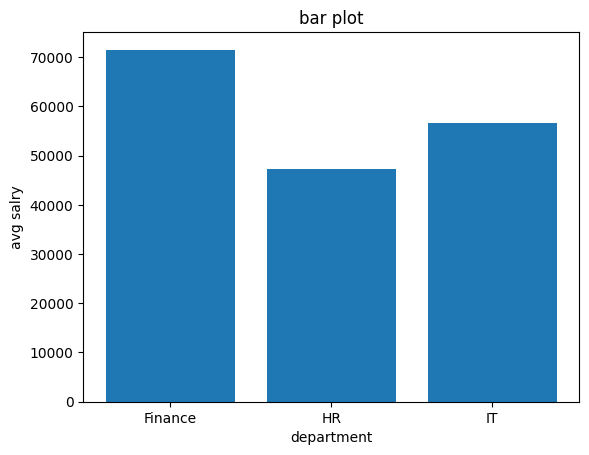

In [65]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df["Salary"])
plt.show()
plt.scatter(df["Experience"],df["Salary"])
plt.show()
m=df.groupby("Department")["Salary"].mean()
plt.bar(m.index,m.values)
plt.xlabel("department")
plt.ylabel("avg salry")
plt.title("bar plot")
plt.show()

Q🔟 (Very Hard – Interview Case Study Question)

Answer in code + comments:

“You are asked to prepare a report to identify top-performing departments based on salary growth potential and experience distribution.”

You must:

Use filtering

Groupby

New calculated columns

At least one visualization

Final DataFrame summary

👉 Interview angle: End-to-end thinking (this is real interview level)